# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## 1.Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st
import os

In [3]:
dt.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
dt.describe()#проверяем на отрицательные значения

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
dt.duplicated().sum()

0

In [7]:
#Для начала переименуем столбцы
dt.columns = dt.columns.str.lower()

In [8]:
dt.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
#Обнаружили что critic_score содержит в себе целые числа
dt['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
#TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)
#Скорее всего либо не было отзывов вообше, либо их было очень мало для формирования рейтинга
#Заменим значение "tbd" - "to be determined" на NaN
dt['user_score'] = dt['user_score'].replace('tbd', np.NaN)
dt['user_score'] = dt['user_score'].astype('float')

In [11]:
#Приведем годы и оценки критиков в целочисленный тип
dt['year_of_release'] = dt['year_of_release'].astype('Int64')
dt['critic_score'] = dt['critic_score'].astype('Int64')

#Оценки пользователей приведем к типу float
dt['user_score'] = dt['user_score'].astype('float64')

In [12]:
dt.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [13]:
#Удалим пустые строки
dt = dt.dropna(subset=['name', 'genre','year_of_release'])

In [14]:
#Заменим пропущенные значения на "undefiend"
dt["rating"] = dt['rating'].fillna("undefined")

In [15]:
#Создадим отдельный столбец с суммой продаж по всем регионам 'total_sales'
dt['total_sales'] = dt['na_sales'] + dt['eu_sales'] + dt['jp_sales'] + dt['other_sales']


In [16]:
dt.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,undefined,28.31


In [17]:
dt.isna().sum()#проверяем пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

### Вывод:
**Самые явные пропуски обработали и заменили.Названия столбцов привели к общему виду.
Пропуски в названии игр и жанре мы удалили,скорее всего ошибочное заполнение.
Большое количество пропусков в critic_score и user_score связано скорее всего с играми где еще не сформирован рейтинг(новые игры,игры еще до рейтинговой системы(старые)).
Есть пропуски в годе выпуска,но заменить их чем либо мы не можем**

In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = dt.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## 2. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

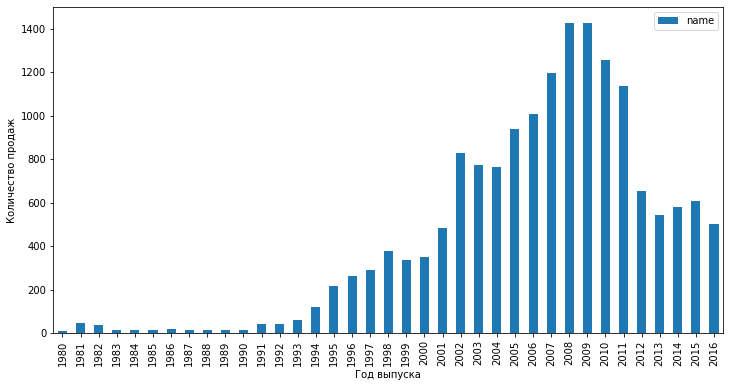

In [19]:
#Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
dt.pivot_table(index='year_of_release',values='name',aggfunc='count').plot(y='name', kind='bar',ylabel='Количество продаж',xlabel='Год выпуска',figsize=(12,6));

Видим что игр до 1994 выпускалось мало из-за малых мощностей комрьютеров и малого количества консолей в принципе.
Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.

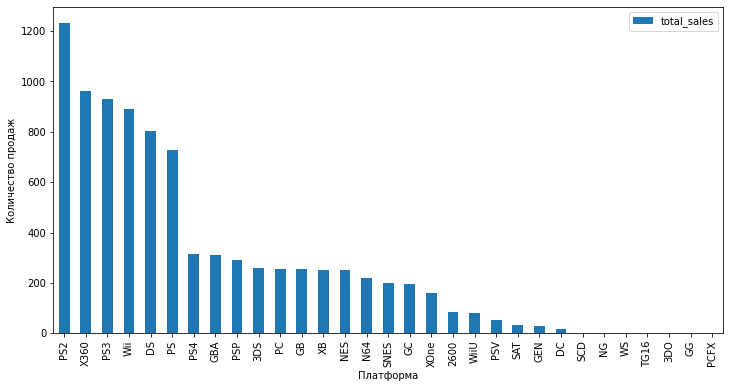

In [20]:
dt.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar',ylabel='Количество продаж',xlabel='Платформа',figsize=(12,6));

С учетом того, что это статистика до 2016 года - безусловным лидером является платформа PS2. PS3 еще не набрала популярность,да и пик выпуска игр пришелся на PS2. Далее идут Xbox360 и Wii.

In [21]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = dt.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms#посмотрим топ 5

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


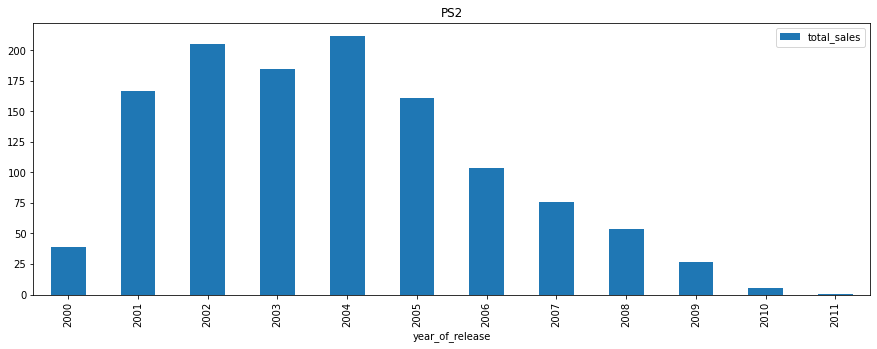

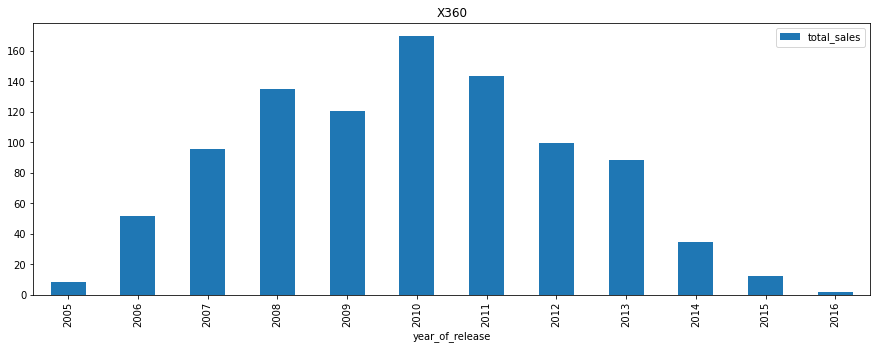

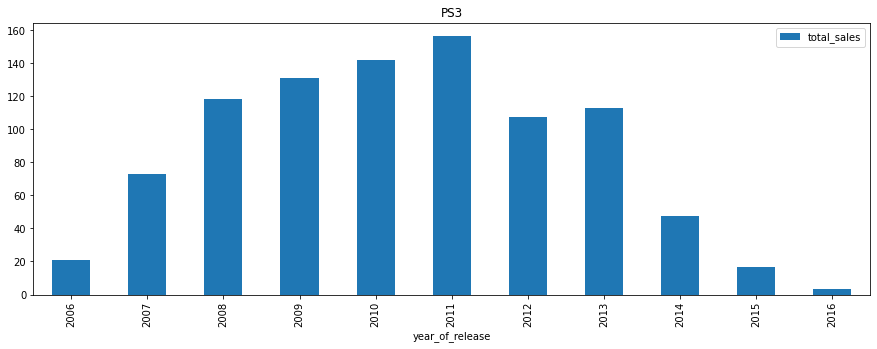

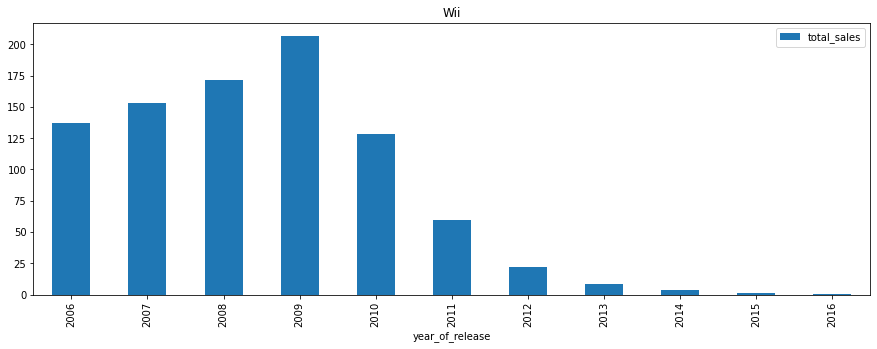

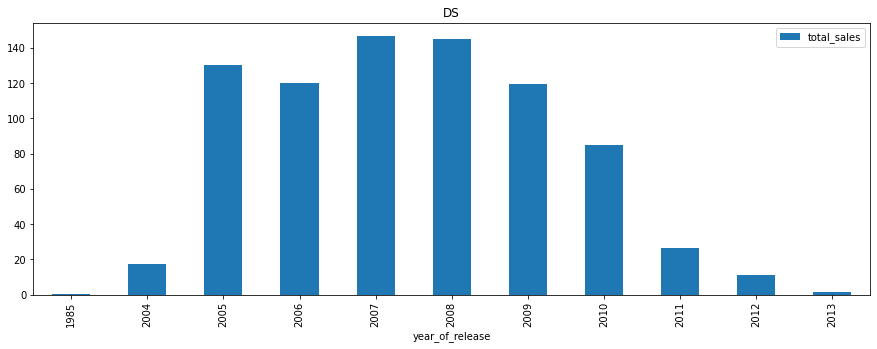

In [60]:
top_platforms = dt.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
for platform in top_platforms.index:
    dt[dt['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)

### Вывод:

Можно заметить, что каждая из платформ 'прожила' примерно по 10 лет

Практически все игровые платформы в среднем существуют по 10 лет. 
Самые высокие продажи у PS и XBox.
У WII был резкий скачок продаж,затем такое же резкое снижение.

In [23]:
actual_data_all = dt.query('year_of_release >= 2006')
actual_data = dt.query('year_of_release >= 2013')

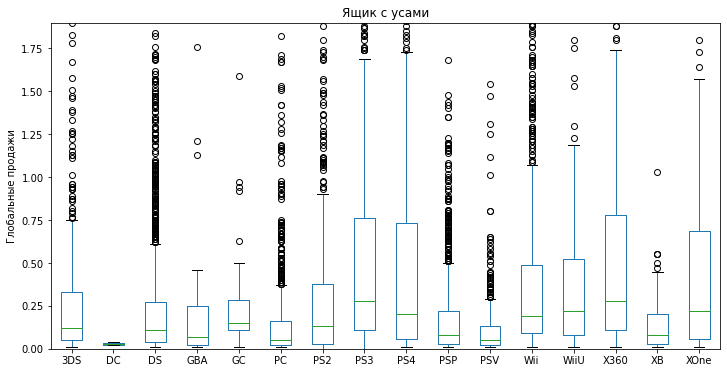

In [24]:
actual_data_all.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,1.9),figsize=(12,6),title='Ящик с усами',xlabel='Платформа',ylabel='Глобальные продажи');

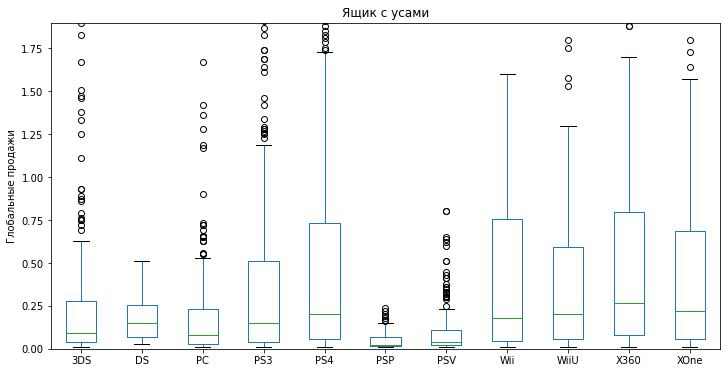

In [25]:
actual_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,1.9),figsize=(12,6),title='Ящик с усами',xlabel='Платформа',ylabel='Глобальные продажи');

### Вывод:
На ящике с усами видим,что также высокие показатели продаж у Xone.В предыдущее исследование не попала по причине малого выпуска количества игр на данную консоль.Добавим XOne в список потенциально прибыльных.

In [26]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 231.2+ KB


In [27]:
XOne = actual_data.query('platform == "XOne"')#посмотрим корреляцию оценок критиков и пользователей
XOne_cor = XOne[['critic_score','user_score', 'total_sales']]
XOne_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


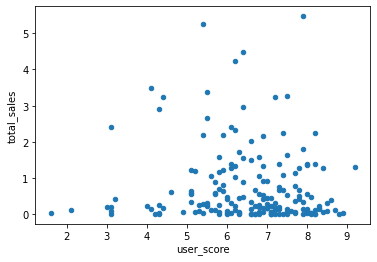

In [28]:
XOne.plot(x='user_score', y='total_sales', kind='scatter');#построим диаграмму рассивания

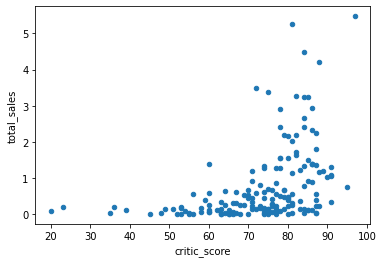

In [29]:
XOne.plot(x='critic_score', y='total_sales', kind='scatter');

In [30]:
PS4 = actual_data.query('platform == "PS4"')
PC = actual_data.query('platform == "PC"')
Wii = actual_data.query('platform == "Wii"')
X360 = actual_data.query('platform == "X360"')
WiiU = actual_data.query('platform == "WiiU"')

In [31]:
PC_cor = PC[['critic_score','user_score', 'total_sales']]
PC_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.429562,0.196030
user_score,0.429562,1.000000,-0.093842
total_sales,0.196030,-0.093842,1.000000


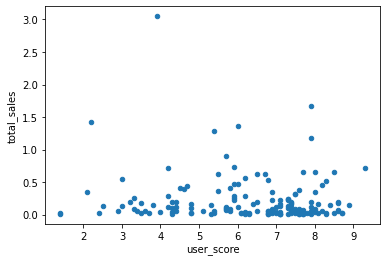

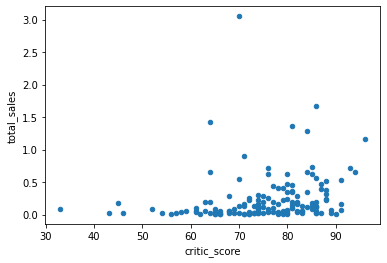

In [32]:
PC.plot(x='user_score', y='total_sales', kind='scatter');
PC.plot(x='critic_score', y='total_sales', kind='scatter');

In [33]:
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


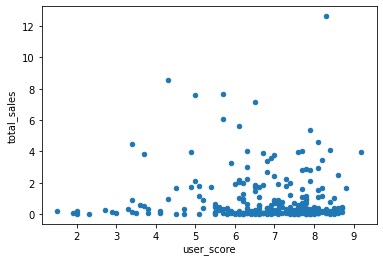

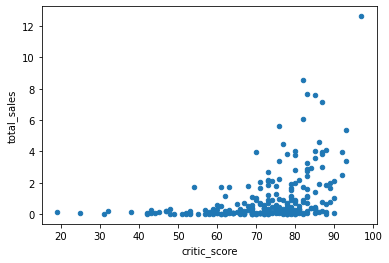

In [34]:
PS4.plot(x='user_score', y='total_sales', kind='scatter');
PS4.plot(x='critic_score', y='total_sales', kind='scatter');

In [35]:
Wii = Wii[['critic_score','user_score', 'total_sales']]
Wii.corr()

,critic_score,user_score,total_sales
critic_score,NaN,NaN,NaN
user_score,NaN,1.000000,0.682942
total_sales,NaN,0.682942,1.000000


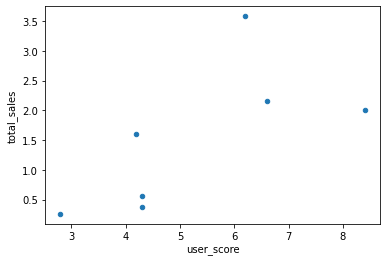

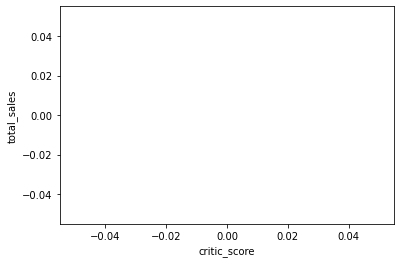

In [36]:
Wii.plot(x='user_score', y='total_sales', kind='scatter');
Wii.plot(x='critic_score', y='total_sales', kind='scatter');

In [37]:
X360 = X360[['critic_score','user_score', 'total_sales']]
X360.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
total_sales,0.350345,-0.011742,1.000000


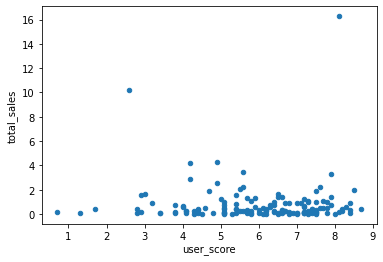

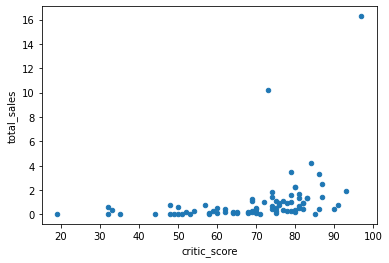

In [38]:
X360.plot(x='user_score', y='total_sales', kind='scatter');
X360.plot(x='critic_score', y='total_sales', kind='scatter');

In [39]:
WiiU = WiiU[['critic_score','user_score', 'total_sales']]
WiiU.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.721313,0.376415
user_score,0.721313,1.000000,0.419330
total_sales,0.376415,0.419330,1.000000


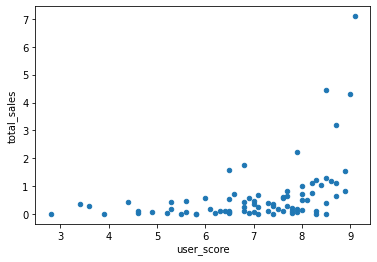

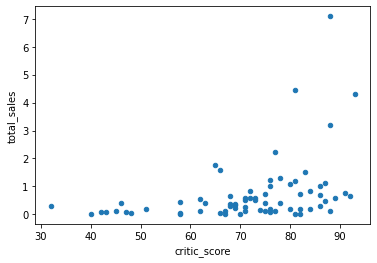

In [40]:
WiiU.plot(x='user_score', y='total_sales', kind='scatter');
WiiU.plot(x='critic_score', y='total_sales', kind='scatter');

<font color='Blue'><b>Комментарий студента</b></font>
Добавил графики,итог ниже поменял.

### Вывод:
На основе анализа оценок пользователей и критиков за интересующий период можно увидеть следующее:
Оценки критиков по всем консолям влияют на количество продаж,а влияние оценок игроков заметно только на WiiU и X360.

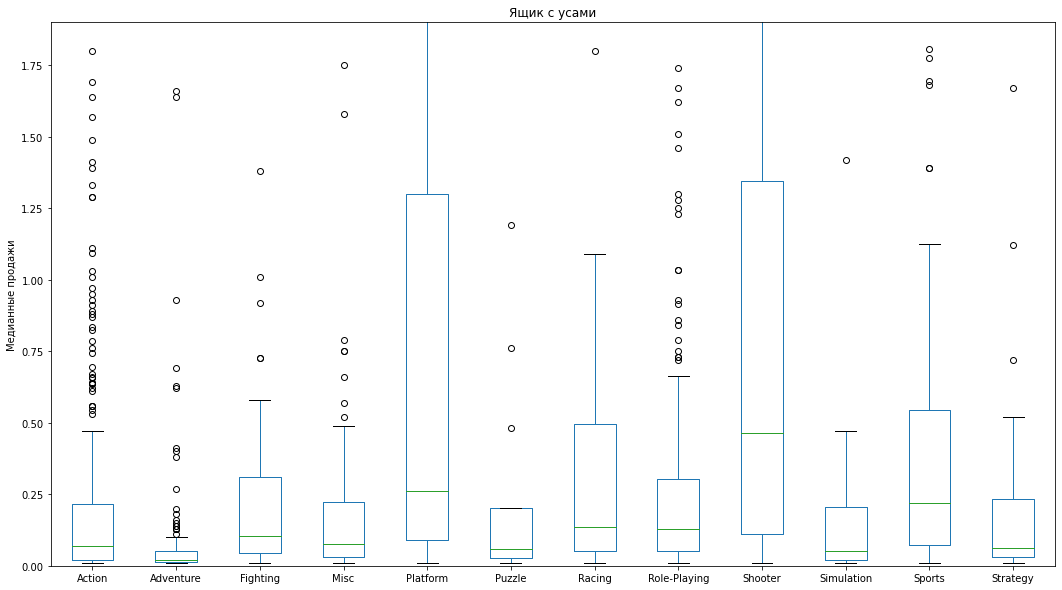

In [41]:
actual_data.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'median').plot(kind='box', ylim=(0,1.9),figsize=(18,10),title='Ящик с усами',xlabel='Жанр',ylabel='Медианные продажи');

In [42]:
genre_median = actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=False, by = 'total_sales')
genre_median

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


### Вывод:

Самые прибыльные жанры - Shooter,Sports,Platform,

Наименее прибыльные жанры - Adventure,Puzzle,Strategy

## 3.Составьте портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 231.2+ KB


#### Посмотрим самые популярные консоли по регионам.

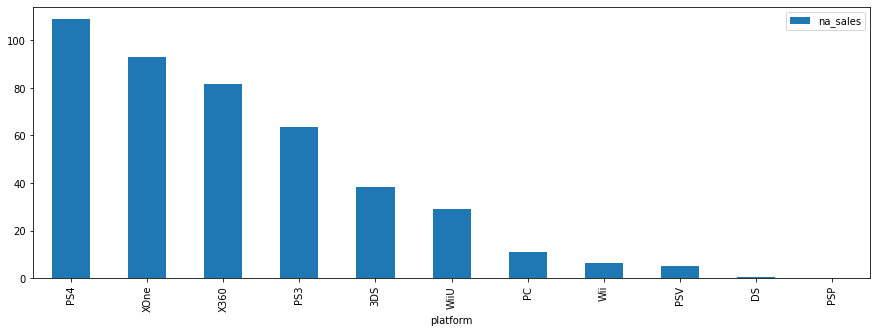

In [44]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5));

В Северной Америке самые популярные консоли PS4,XOne,X360.

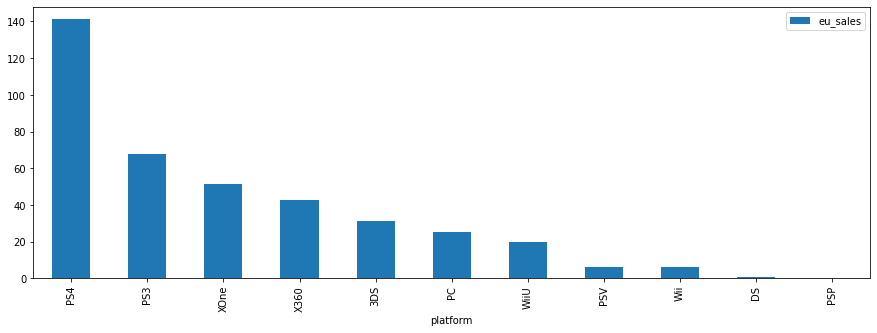

In [45]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5));

В Европе PS4,PS3 и XOne.

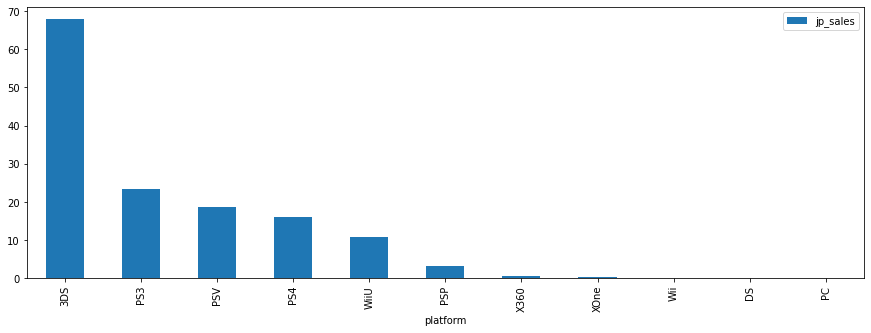

In [46]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5));

В Японии 3DS,PS3 и PSV.

### Вывод:
По Америке и Европе лидеры одни и те же,в Японии же преобладает консоль местного производства Nintendo.
В ТОП-5 же входят везде одни и те же консоли.

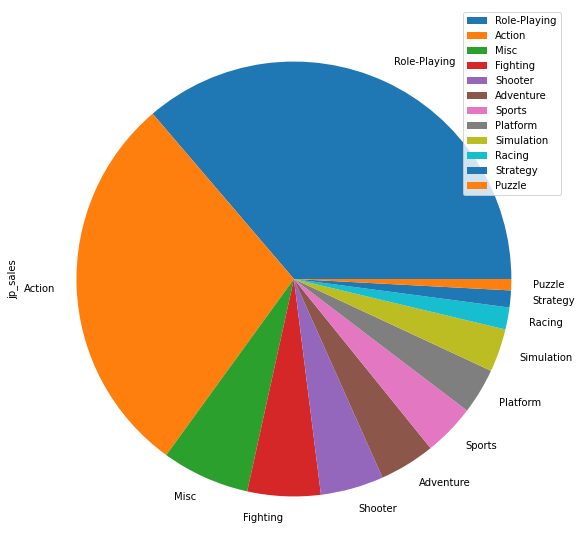

In [47]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'pie', figsize=(10,10),y= 'jp_sales');

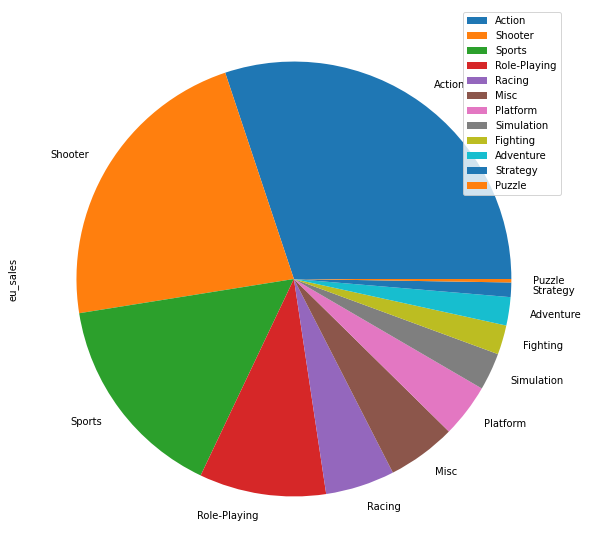

In [48]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'pie', figsize=(10,10),y= 'eu_sales');

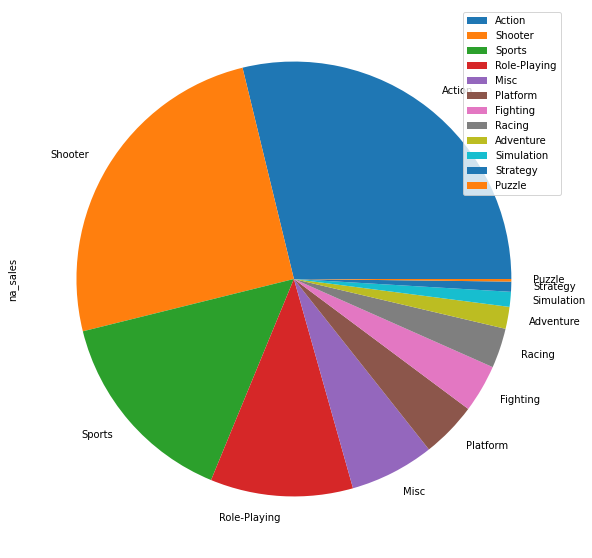

In [49]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'pie', figsize=(10,10),y='na_sales');

### Вывод:
В Европе и Америке ТОП-5 выглядит одинаково,за исключением чуть более популярных гонок над ролевыми играми.
В Японии,как в самобытной стране с другой культурой,самый популярный жанр ролевые игры.
А также в ТОПе Аркады и Платформеры.
Экшн даже в Японии на 2 месте.



In [50]:
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
undefined,78.91,85.05,89.42


### Вывод:

Рейтинг влиет только на продажи в Северной Америке,т.к.в Европе и Японии данный рейтинг не проставляется-судить о его влиянии в данных регионах мы не можем.

## 4. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
- Поясните:
  Как вы сформулировали нулевую и альтернативную гипотезы;
  Какой критерий применили для проверки гипотез и почему.

### 1 проверка:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [51]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


In [52]:
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### 1 гипотеза подтвердилась.
Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Связано скорее всего с наличием игр от Microsoft на обеих платформах.

### 2 Проверка:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [53]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']
Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


In [54]:
#проверяем вторую гипотезу

alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


### 2 гепотеза  не подтвердилась,значения разные.
Средние пользовательские рейтинги жанров Action и Sports отличаются

## 5.Общий вывод

### Анализ:
- За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS.
- Консоль устаревает за 10 лет.
- До 1994 выпускалось мало из-за малых мощностей комрьютеров и малого количества консолей в принципе. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.
- Самые прибыльные жанры - Shooter,Sports,Platform,
- Наименее прибыльные жанры - Adventure,Puzzle,Strategy
- В Северной Америке самые популярные консоли PS4,XOne,X360..
- В Европе PS4,PS3 и XOne.
- В Японии 3DS,PS3 и PSV.
- Оценки критиков в большей степени влияют на количество продаж,в отличии от оценок пользователей.
- Рейтинг ESRB не влияет на продажи по всем регионам,только в Северной Америке.

### Гипотезы:
- 1 гипотеза подтвердилась:средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Связано скорее всего с наличием игр от Microsoft на обеих платформах.
- 2 гипотеза не подтвердилась:Средние пользовательские рейтинги жанров Action и Sports отличаются

### Рекомендации по реализации бюджета:
Платформы:PS4 и Xone-на 2016 г консоли последнего поколения,наиболее популярны в Северной Америке и Европе,соответственно в данных регионах и стоит начинать продвигать.
Жанры:Shooter и Action.
Рейтинг:M
Следует ориентироваться на отзывы критиков.





